<a href="https://colab.research.google.com/github/Anshuman776/Machine-Learning-Project/blob/main/Decision_Tree_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import all libaries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data preprocessing

In [6]:
dataframe = pd.read_csv('/content/WineQT.csv')
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
dataframe.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


EDA

In [8]:
dataframe.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


In [9]:
dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/tmp/ipython-input-417177955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.quality)


<Axes: xlabel='quality', ylabel='Density'>

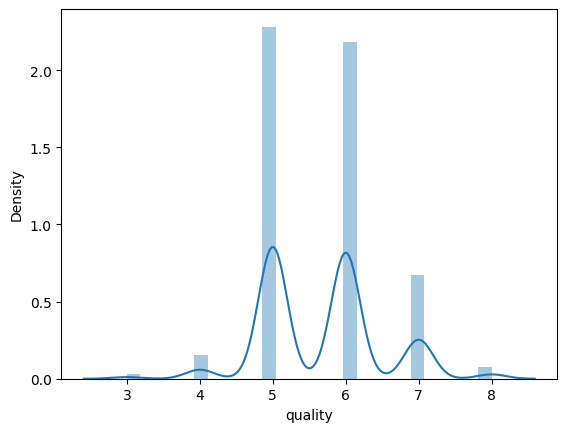

In [10]:
sns.distplot(dataframe.quality)

/tmp/ipython-input-4244311501.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.alcohol)


<Axes: xlabel='alcohol', ylabel='Density'>

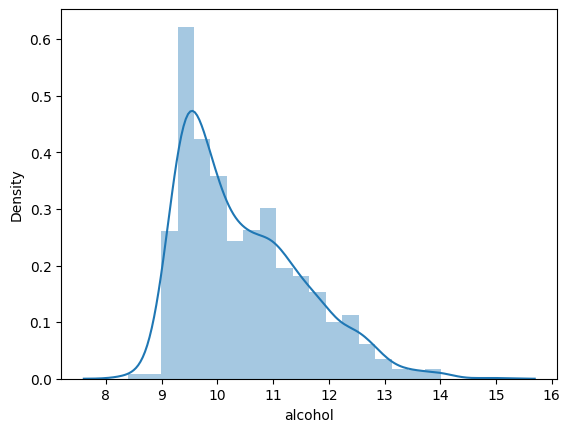

In [11]:
sns.distplot(dataframe.alcohol)

/tmp/ipython-input-2991950385.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.sulphates)


<Axes: xlabel='sulphates', ylabel='Density'>

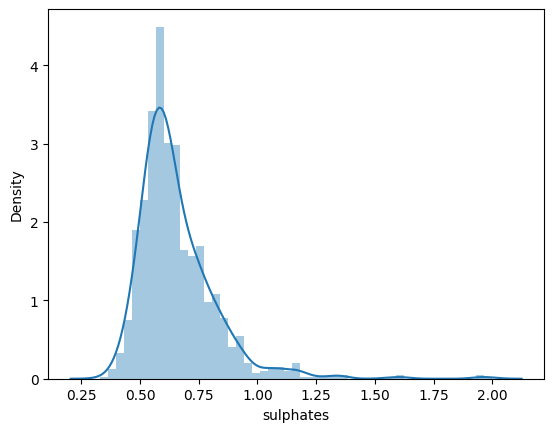

In [12]:
sns.distplot(dataframe.sulphates)

/tmp/ipython-input-2699779096.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.pH)


<Axes: xlabel='pH', ylabel='Density'>

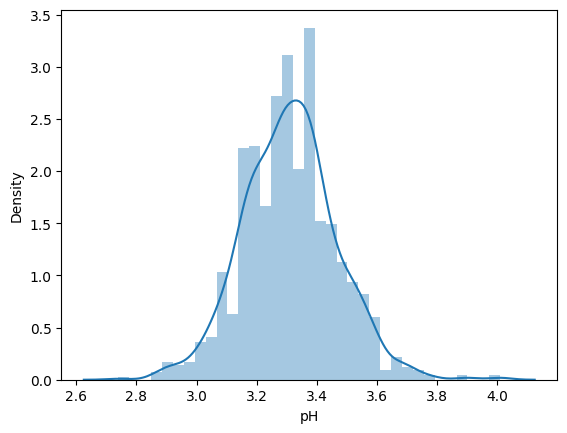

In [13]:
sns.distplot(dataframe.pH)

/tmp/ipython-input-3748519566.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.density)


<Axes: xlabel='density', ylabel='Density'>

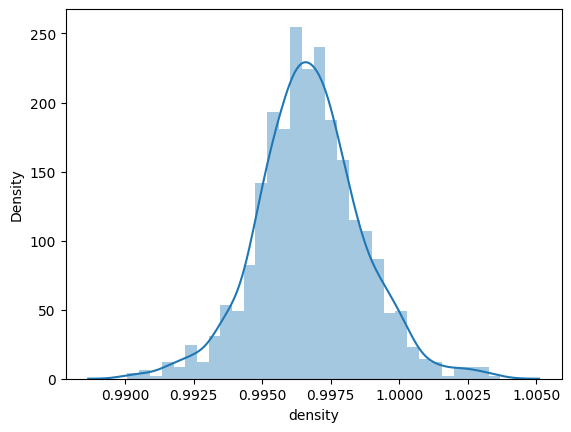

In [14]:
sns.distplot(dataframe.density)

/tmp/ipython-input-3216493023.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['total sulfur dioxide'])


<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

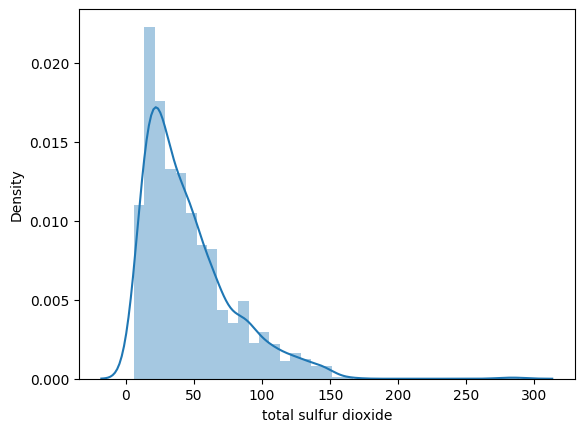

In [15]:
sns.distplot(dataframe['total sulfur dioxide'])

/tmp/ipython-input-668533715.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['free sulfur dioxide'])


<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

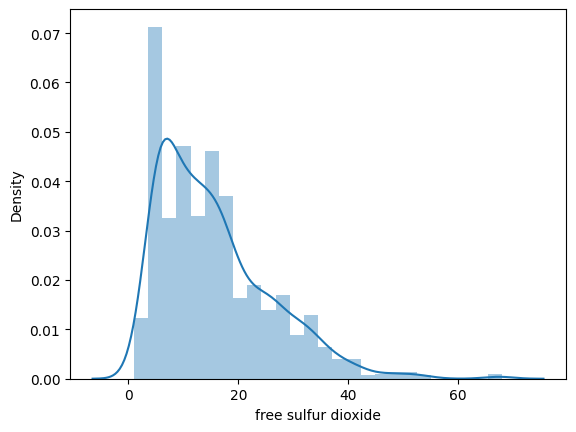

In [16]:
sns.distplot(dataframe['free sulfur dioxide'])

/tmp/ipython-input-2224237132.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.chlorides)


<Axes: xlabel='chlorides', ylabel='Density'>

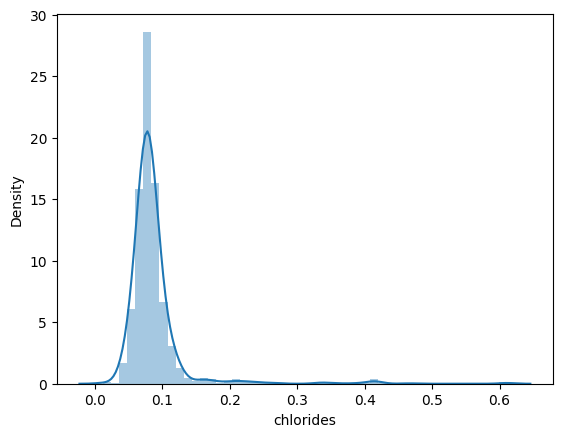

In [17]:
sns.distplot(dataframe.chlorides)

/tmp/ipython-input-1093111192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['residual sugar'])


<Axes: xlabel='residual sugar', ylabel='Density'>

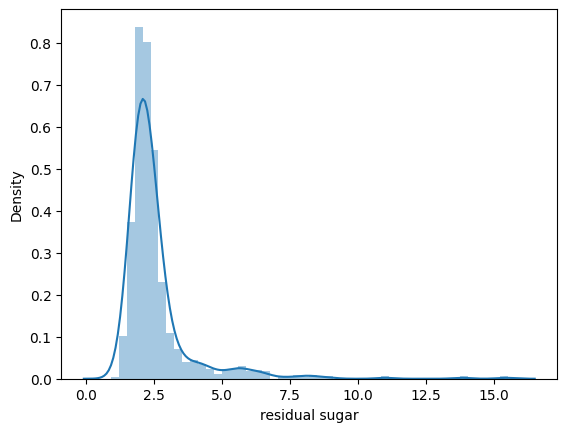

In [18]:
sns.distplot(dataframe['residual sugar'])

/tmp/ipython-input-1353866125.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['citric acid'])


<Axes: xlabel='citric acid', ylabel='Density'>

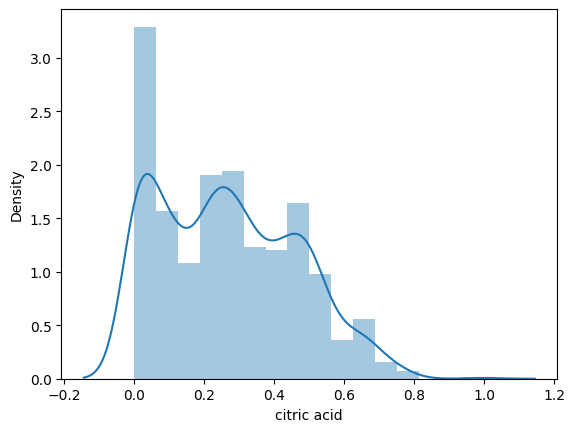

In [19]:
sns.distplot(dataframe['citric acid'])

/tmp/ipython-input-1230425937.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['volatile acidity'])


<Axes: xlabel='volatile acidity', ylabel='Density'>

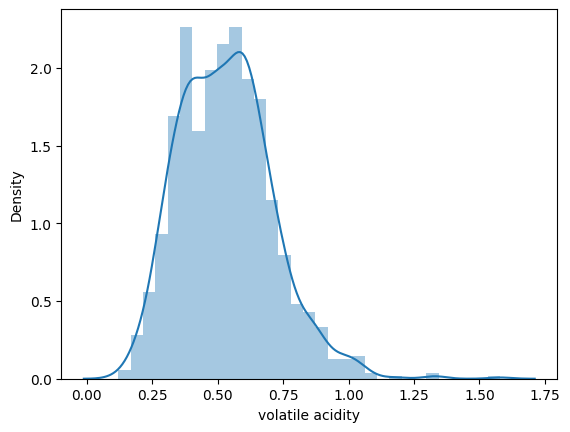

In [20]:
sns.distplot(dataframe['volatile acidity'])

/tmp/ipython-input-3538871692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['fixed acidity'])


<Axes: xlabel='fixed acidity', ylabel='Density'>

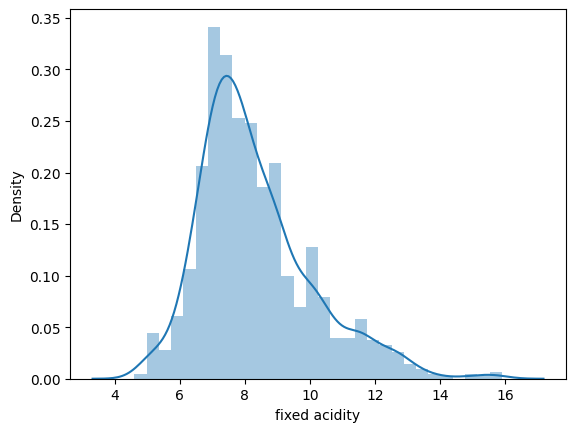

In [21]:
sns.distplot(dataframe['fixed acidity'])

In [22]:
dataframe.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [23]:
dataframe['quality'] = dataframe['quality'].replace(0, dataframe['quality'].mean())
dataframe['alcohol'] = dataframe['alcohol'].replace(0, dataframe['alcohol'].median())
dataframe['sulphates'] = dataframe['sulphates'].replace(0, dataframe['sulphates'].median())
dataframe['pH'] = dataframe['pH'].replace(0, dataframe['pH'].mean())
dataframe['density'] = dataframe['density'].replace(0, dataframe['density'].mean())
dataframe['total sulfur dioxide'] = dataframe['total sulfur dioxide'].replace(0, dataframe['total sulfur dioxide'].median())
dataframe['free sulfur dioxide'] = dataframe['free sulfur dioxide'].replace(0, dataframe['free sulfur dioxide'].median())
dataframe['chlorides'] = dataframe['chlorides'].replace(0, dataframe['chlorides'].median())
dataframe['residual sugar'] = dataframe['residual sugar'].replace(0, dataframe['residual sugar'].median())
dataframe['citric acid'] = dataframe['citric acid'].replace(0, dataframe['citric acid'].mean())
dataframe['volatile acidity'] = dataframe['volatile acidity'].replace(0, dataframe['volatile acidity'].mean())
dataframe['volatile acidity'] = dataframe['volatile acidity'].replace(0, dataframe['volatile acidity'].mean())


Train and split

In [24]:
X=dataframe.drop(columns='quality',axis=1)
y=dataframe['quality']


In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y)

model training

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# fit model
model.fit(X_train, y_train)

DecisionTreeClassifier()

model prediction


In [27]:
y_pred = model.predict(X_test)

Model Interpretaion

[Text(0.5093194565850816, 0.9705882352941176, 'x[10] <= 10.55\ngini = 0.637\nsamples = 857\nvalue = [1.0, 28.0, 362.0, 353.0, 101.0, 12.0]'),
 Text(0.2767245775058275, 0.9117647058823529, 'x[9] <= 0.595\ngini = 0.545\nsamples = 530\nvalue = [1, 18, 308, 179, 22, 2]'),
 Text(0.3930220170454546, 0.9411764705882353, 'True  '),
 Text(0.08675699300699301, 0.8529411764705882, 'x[9] <= 0.525\ngini = 0.417\nsamples = 248\nvalue = [0, 9, 181, 55, 3, 0]'),
 Text(0.02097902097902098, 0.7941176470588235, 'x[1] <= 0.335\ngini = 0.277\nsamples = 102\nvalue = [0, 5, 86, 10, 1, 0]'),
 Text(0.009324009324009324, 0.7352941176470589, 'x[5] <= 5.5\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 1, 2, 0, 0]'),
 Text(0.004662004662004662, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.013986013986013986, 0.6764705882352942, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(0.03263403263403263, 0.7352941176470589, 'x[10] <= 9.15\ngini = 0.254\nsamples = 99\nvalue =

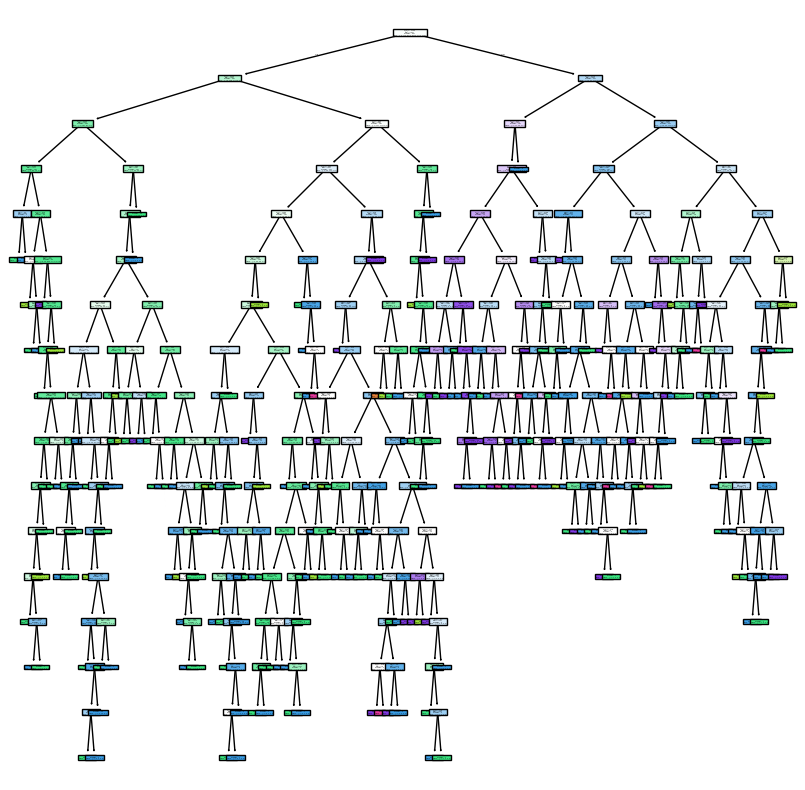

In [28]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True)

Model testing on numbers so that it working fine or not

to test that every thing is working fine we will take 20 data to check it

In [29]:
sampledata = dataframe.head(20)

[Text(0.375, 0.9, 'x[1] <= 0.355\ngini = 0.465\nsamples = 20\nvalue = [14, 3, 3]'),
 Text(0.16666666666666666, 0.7, 'x[8] <= 3.23\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.2708333333333333, 0.8, 'True  '),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5833333333333334, 0.7, 'x[6] <= 22.0\ngini = 0.304\nsamples = 17\nvalue = [14, 1, 2]'),
 Text(0.4791666666666667, 0.8, '  False'),
 Text(0.4166666666666667, 0.5, 'x[5] <= 6.5\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.5, 'x[3] <= 2.35\ngini = 0.133\nsamples = 14\nvalue = [13, 1, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]'),
 Text(0.8333333333333334, 0.3, 'x[3] <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.75

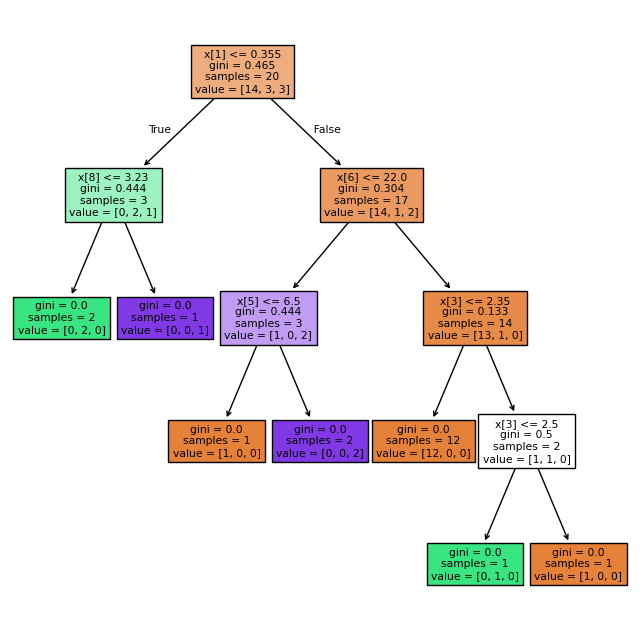

In [30]:
X_sample = sampledata.drop(columns="quality",axis=1)
y_sample = sampledata['quality']
sampleModel = DecisionTreeClassifier()
sampleModel.fit(X_sample,y_sample)
from sklearn import tree
plt.figure(figsize=(8,8))
tree.plot_tree(sampleModel,filled=True)

**BY defult gini parmeter**

i forget to do outlier detction and so it might have some outliers

In [31]:
set(sampledata.quality)

{5, 6, 7}

i want call confusion matrix

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.64      0.62      0.63       121
           6       0.50      0.51      0.50       109
           7       0.47      0.50      0.48        42
           8       0.25      0.25      0.25         4

    accuracy                           0.53       286
   macro avg       0.31      0.31      0.31       286
weighted avg       0.53      0.53      0.53       286



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


next time vist
*   outliers detection i have to do
*   and minimize outliers



Hyperparameter tuning

In [33]:
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

Evaluting the intial Model


In [34]:
rf.score(X_test,y_test)

0.6608391608391608

Making predictions with the initial model

In [35]:
y_predict_rf = rf.predict(X_test)
print(y_predict_rf)

[6 6 5 5 5 7 6 5 5 5 6 6 5 6 6 6 5 5 5 5 5 6 6 5 5 6 5 5 6 5 6 6 5 5 5 5 5
 7 6 5 6 6 5 5 6 6 6 6 6 5 7 6 5 5 6 6 6 5 5 6 6 6 7 6 7 5 5 6 6 6 6 5 6 6
 6 5 6 5 5 6 6 6 7 5 5 6 6 6 6 5 6 5 5 6 5 6 5 7 6 6 5 5 6 5 5 5 6 7 7 6 5
 6 6 5 6 6 6 5 5 6 6 5 6 7 6 6 5 6 5 7 6 6 5 5 7 5 5 5 5 6 6 6 6 7 5 6 6 5
 5 6 6 5 6 5 5 5 6 6 5 5 5 6 6 6 6 6 5 5 6 6 7 7 5 5 6 7 7 5 6 6 6 6 5 5 6
 6 6 6 6 6 5 5 6 5 5 5 5 6 5 6 6 5 6 7 6 5 5 6 5 5 5 6 6 6 6 7 5 5 6 6 7 5
 6 5 5 5 6 6 5 7 7 6 6 6 6 5 5 6 6 6 5 6 6 5 7 5 5 6 5 5 6 5 6 5 7 5 7 5 5
 5 6 6 6 6 5 6 5 6 5 6 5 6 5 5 6 6 5 5 6 5 5 6 6 6 6 6]


Accessing the individual tree in the forest

In [36]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1941165408),
 DecisionTreeClassifier(max_features='sqrt', random_state=1407051259),
 DecisionTreeClassifier(max_features='sqrt', random_state=1883532306),
 DecisionTreeClassifier(max_features='sqrt', random_state=353580978),
 DecisionTreeClassifier(max_features='sqrt', random_state=1368901185),
 DecisionTreeClassifier(max_features='sqrt', random_state=1698387263),
 DecisionTreeClassifier(max_features='sqrt', random_state=256092117),
 DecisionTreeClassifier(max_features='sqrt', random_state=561040696),
 DecisionTreeClassifier(max_features='sqrt', random_state=2032563350),
 DecisionTreeClassifier(max_features='sqrt', random_state=1744178588),
 DecisionTreeClassifier(max_features='sqrt', random_state=1861191434),
 DecisionTreeClassifier(max_features='sqrt', random_state=293674989),
 DecisionTreeClassifier(max_features='sqrt', random_state=507152615),
 DecisionTreeClassifier(max_features='sqrt', random_state=2078401410),
 DecisionTr

Define a Hyperparameter Grid for Grid Search

In [37]:
grid_param = {
    "n_estimators":[5,10,50,100,120,150],
    "criterion" :['gini','entropy'],
    "max_depth":range(1, 10),
    'min_samples_leaf':range(1, 10)

}

Performing grid search with cross validation

In [39]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,param_grid=grid_param,cv=10,n_jobs=6,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2280 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_param

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

retrive the best Hyperparametrs

In [40]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 150}

Training the optimized random forest model

In [41]:
rf_new = RandomForestClassifier(n_estimators=150, criterion='entropy', max_depth=9, min_samples_leaf=1)
rf_new.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=150)

In [42]:
rf_new.score(X_test,y_test)

0.6538461538461539

it has decrese the score but not at my standard gap so i will using randomsearch cv

In [44]:
from sklearn.model_selection import RandomizedSearchCV

# You can use the same grid_param dictionary as defined before,
# RandomizedSearchCV will sample randomly from these values
random_search = RandomizedSearchCV(estimator=rf, param_distributions=grid_param, cv=10, n_jobs=6, verbose=1)

# Fit the model
random_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=6,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(0, 10),
                                        'min_samples_leaf': range(0, 10),
                                        'n_estimators': [5, 10, 50, 100, 120,
                                                         150]},
                   verbose=1)

In [46]:
random_search.best_params_


{'n_estimators': 100,
 'min_samples_leaf': 3,
 'max_depth': 7,
 'criterion': 'gini'}

In [47]:
r_new = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=7,min_samples_leaf=3)
r_new.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=3)

In [48]:
r_new.score(X_test,y_test)

0.6048951048951049

we can clearly see that randomizedsearchCv gives better result than gridsearchcv for that condition we will use randomserchcv

both have different works were as grid goes one by one  and takes time in implementation whereas it does not take it take random from grid you define it depends whisch work fine in that case it depends on set of rules


so, it depends what we doing on that basis we will use it
